In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
selected_df = pd.read_csv('selected.csv')

In [3]:
selected_df.columns

Index(['Unnamed: 0', 'Name', 'Position', 'Wiki_Views', 'PreviousValue',
       'Club_Cat', 'TotalGoals', 'TotalAssists', 'TotalMinsClub',
       'FantasyLeagueVal', 'F_Rating', 'F_Drib', 'F_Passing', 'CurrentValue'],
      dtype='object')

In [4]:
position = pd.get_dummies(selected_df['Position'],drop_first=True)
club = pd.get_dummies(selected_df['Club_Cat'],drop_first=True)

In [5]:
X = selected_df.drop(['Name','CurrentValue','Position','Club_Cat'],axis=1)
X = pd.concat([X,position,club],axis=1)
y = selected_df['CurrentValue']

In [6]:
X.columns

Index([      'Unnamed: 0',       'Wiki_Views',    'PreviousValue',
             'TotalGoals',     'TotalAssists',    'TotalMinsClub',
       'FantasyLeagueVal',         'F_Rating',           'F_Drib',
              'F_Passing',               'CM',         'Defender',
                 'Keeper',          'Striker',           'Winger',
                        2,                  3,                  4],
      dtype='object')

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [8]:
from sklearn.model_selection import KFold

In [9]:
from sklearn.linear_model import Ridge

# Excluding Crowdsourcing, Popularity and Previous Year Statistics

In [14]:
X1 = X.drop(['Wiki_Views', 'PreviousValue', 'FantasyLeagueVal', 'F_Rating', 'F_Drib', 'F_Passing' ], axis=1)

In [15]:
X1.columns

Index([   'Unnamed: 0',    'TotalGoals',  'TotalAssists', 'TotalMinsClub',
                  'CM',      'Defender',        'Keeper',       'Striker',
              'Winger',               2,               3,               4],
      dtype='object')

In [16]:
shuffle = KFold(n_splits=10,shuffle=True)
scores = cross_val_score(Ridge(), X1, y, cv=shuffle, scoring="r2")
print(scores)
print(scores.mean())

[0.73302623 0.68192827 0.24420491 0.45258838 0.45399397 0.4963272
 0.34841527 0.5497361  0.67841856 0.57313421]
0.521177310836278


In [17]:
maxmean=0
for alpha in [100,10,0,0.1,0.01,0.001]:
    shuffle = KFold(n_splits=10,shuffle=True)
    scores = cross_val_score(Ridge(), X1, y, cv=shuffle, scoring="r2")
    meansc = scores.mean()
    if meansc > maxmean:
        maxmean = meansc
        alphamax = alpha
print(maxmean,alphamax)

0.46684739757918514 0.01


In [18]:
shuffle = KFold(n_splits=10,shuffle=True)
scores = cross_val_score(Ridge(alpha=0.01), X1, y, cv=shuffle, scoring="r2")
print(scores)
print(scores.mean())

[0.71341934 0.44171158 0.2463768  0.3118506  0.53591815 0.57063299
 0.63488142 0.49254622 0.15201482 0.59092038]
0.46902723031306487


In [19]:
shuffle = KFold(n_splits=10,shuffle=True)
scores = cross_val_score(Ridge(alpha=0.01), X1, y, cv=shuffle, scoring="neg_mean_squared_error")
print(-scores)
print(np.sqrt(-scores).mean())

[129.7876245  197.30951837 209.19933675  99.32745658 170.457501
 119.40798215 544.43595729  81.32204301 144.04278086 154.01645018]
13.061564592833301


# Including popularity parameters

In [20]:
X1 = X.drop(['PreviousValue', 'FantasyLeagueVal', 'F_Rating', 'F_Drib', 'F_Passing' ], axis=1)
shuffle = KFold(n_splits=10,shuffle=True)
scores = cross_val_score(Ridge(), X1, y, cv=shuffle, scoring="r2")
print(scores)
print(scores.mean())
maxmean=0
for alpha in [100,10,0,0.1,0.01,0.001]:
    shuffle = KFold(n_splits=10,shuffle=True)
    scores = cross_val_score(Ridge(), X1, y, cv=shuffle, scoring="r2")
    meansc = scores.mean()
    if meansc > maxmean:
        maxmean = meansc
        alphamax = alpha
print(maxmean,alphamax)
shuffle = KFold(n_splits=10,shuffle=True)
scores = cross_val_score(Ridge(alpha=10), X1, y, cv=shuffle, scoring="r2")
print(scores)
print(scores.mean())
shuffle = KFold(n_splits=10,shuffle=True)
scores = cross_val_score(Ridge(alpha=10), X1, y, cv=shuffle, scoring="neg_mean_squared_error")
print(-scores)
print(np.sqrt(-scores).mean())

[0.29612084 0.74110978 0.25877346 0.5450637  0.7311459  0.73329037
 0.58675066 0.78442977 0.58462021 0.42579384]
0.5687098540634421
0.5372369940288811 10
[0.68153471 0.60873771 0.54678352 0.03868041 0.7801137  0.33808895
 0.11879213 0.89448004 0.25635091 0.53085837]
0.479442044224888
[148.87564112  72.37729434 124.76215493  99.67172836 115.46546878
 117.46160812 140.98146602 449.26657272 160.78369793  76.21045259]
11.79250548372142


# Including Crowdsourcing & popularity parameters

In [10]:
X1 = X.drop([ 'PreviousValue'], axis=1)
shuffle = KFold(n_splits=10,shuffle=True)
scores = cross_val_score(Ridge(), X1, y, cv=shuffle, scoring="r2")
print(scores)
print(scores.mean())
maxmean=0
for alpha in [100,10,0,0.1,0.01,0.001]:
    shuffle = KFold(n_splits=10,shuffle=True)
    scores = cross_val_score(Ridge(), X1, y, cv=shuffle, scoring="r2")
    meansc = scores.mean()
    if meansc > maxmean:
        maxmean = meansc
        alphamax = alpha
print(maxmean,alphamax)
shuffle = KFold(n_splits=10,shuffle=True)
scores = cross_val_score(Ridge(alpha=0.01), X1, y, cv=shuffle, scoring="r2")
print(scores)
print(scores.mean())
shuffle = KFold(n_splits=10,shuffle=True)
scores = cross_val_score(Ridge(alpha=0.01), X1, y, cv=shuffle, scoring="neg_mean_squared_error")
print(-scores)
print(np.sqrt(-scores).mean())

[0.32069416 0.70699036 0.75427392 0.56794824 0.57055829 0.34445143
 0.68930746 0.71494793 0.36991685 0.51467779]
0.5553766433521278
0.632460407661392 0.01
[ 0.53155262  0.66671484  0.6474134  -0.35558272  0.56646365  0.22961415
  0.51302534  0.64464126  0.88621205  0.63830946]
0.4968364056270479
[ 98.51248241  89.88711507  96.57581215 115.03849842  35.08464067
  67.40676675 129.92350908  46.8369719  162.53147571 660.46181586]
11.078290639982496


# Including Crowdsourcing, Popularity and Previous Year Statistics

In [11]:
X1 = X
shuffle = KFold(n_splits=10,shuffle=True)
scores = cross_val_score(Ridge(), X1, y, cv=shuffle, scoring="r2")
print(scores)
print(scores.mean())
maxmean=0
for alpha in [100,10,0,0.1,0.01,0.001]:
    shuffle = KFold(n_splits=10,shuffle=True)
    scores = cross_val_score(Ridge(), X1, y, cv=shuffle, scoring="r2")
    meansc = scores.mean()
    if meansc > maxmean:
        maxmean = meansc
        alphamax = alpha
print(maxmean,alphamax)
shuffle = KFold(n_splits=10,shuffle=True)
scores = cross_val_score(Ridge(alpha=10), X1, y, cv=shuffle, scoring="r2")
print(scores)
print(scores.mean())
shuffle = KFold(n_splits=10,shuffle=True)
scores = cross_val_score(Ridge(alpha=10), X1, y, cv=shuffle, scoring="neg_mean_squared_error")
print(-scores)
print(np.sqrt(-scores).mean())

[0.93276238 0.92177207 0.75675913 0.94958228 0.72680355 0.91210579
 0.88179833 0.9169762  0.79261888 0.92526188]
0.8716440499065026
0.8865696977019502 0.01
[0.79896957 0.92670373 0.94116489 0.91510616 0.757929   0.91335679
 0.78288433 0.83317333 0.91392143 0.89468515]
0.8677894388292324
[ 13.73524997 120.24656507  31.70343207  12.44692479  98.53837276
  62.06987099  24.80510332  19.88680127   9.85086288  16.13102541]
5.823038979646765


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

In [13]:
y_pred = cross_val_predict(Ridge(alpha=10),X1,y,cv=shuffle)

In [14]:
# SOURCE : https://github.com/amirhessam88/Regression-Error-Characteristic-Curve/blob/master/REC.ipynb
def REC(y_true , y_pred):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_true)):
            if np.linalg.norm(y_true[j] - y_pred[j]) / np.sqrt( np.linalg.norm(y_true[j]) **2 + np.linalg.norm(y_pred[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_true))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

In [15]:
# finding the deviation and accuracy, and area under curve for plotting
Deviation , Accuracy, AUC = REC(y , y_pred)

In [16]:
# Calculating R^2 of the true and predicted values
RR = r2_score(y , y_pred)

In [18]:
y_true = y

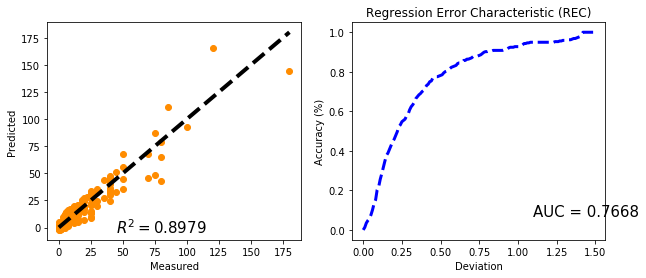

In [21]:
#https://github.com/amirhessam88/Regression-Error-Characteristic-Curve/blob/master/REC.ipynb
# Plotting
plt.figure(figsize=(10 , 4))

plt.subplot(1, 2, 1)
plt.scatter(y_true, y_pred,color = "darkorange")
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()